In [69]:
import pandas as pd

df = pd.concat([pd.read_csv("data/train.csv"),
                pd.read_csv("data/val.csv"),
                pd.read_csv("data/test_with_annotation.csv")])              

df["Clinical department"] = df.pop("Subject")
df["Discipline"] = df.pop("一级标签")
df["Competency"] = df.pop("Ability")

In [70]:
len(df[~df['答案解析'].isna()])/len(df)

0.8523759890779371

In [72]:
import scipy.stats as stats
import numpy as np

def median_iqr(col):
    df[col] = df[col].fillna("")
    lengths = df[col].str.len()
    median = np.median(lengths)
    q1 = np.percentile(lengths, 25)
    q3 = np.percentile(lengths, 75)
        
    print(f"median: {median} (Q1: {q1}, Q3: {q3})")


In [73]:
median_iqr("答案解析")

median: 147.0 (Q1: 70.0, Q3: 248.0)


In [75]:
df["choices"] = df["选项"].str.split("\n")

In [76]:
df["ICD-11"].value_counts()["不符合"]

2318

In [77]:
df["Competency"].value_counts()

医学基础知识       2897
疾病诊断和鉴别诊断    1630
疾病治疗         1308
公卫法律伦理        931
不符合            45
Name: Competency, dtype: int64

In [78]:
translation_mapping = {
    "医学基础知识": "MedFund",  # Medical Fundamentals
    "疾病诊断和鉴别诊断": "Diag",  # Disease Diagnosis and Differential Diagnosis
    "疾病治疗": "Treat",  # Disease Treatment
    "公卫法律伦理": "PHL",  # Public Health Law and Ethics
    "不符合": "N/A"  # Not Applicable
}

df["Competency"] = df["Competency"].map(translation_mapping)

translation_mapping = {
    "临床医学": "ClinMed",  # Clinical Medicine
    "口腔医学": "Dent",  # Dentistry
    "公卫预防": "PH&PM",  # Public Health and Preventive Medicine
    "中医学": "TCM",  # Traditional Chinese Medicine
    "中西医结合": "ICWM",  # Integrated Chinese and Western Medicine
    "药学": "Pharm",  # Pharmacy
    "中药学": "TCPharm"  # Traditional Chinese Pharmacy
}

df["Discipline"] = df["Discipline"].map(translation_mapping)

translation_mapping = {
    "预防保健科": "PrevMed",  # Preventive Medicine
    "全科医疗": "GenMed",  # General Medicine
    "内科": "IM",  # Internal Medicine
    "外科": "Surg",  # Surgery
    "妇产科": "OBGYN",  # Obstetrics and Gynecology
    "妇女保健": "WH",  # Women's Health
    "儿科": "Ped",  # Pediatrics
    "儿童外科": "PedSurg",  # Pediatric Surgery
    "儿童保健科": "PedHC",  # Pediatric Health Care
    "眼科": "Ophth",  # Ophthalmology
    "耳鼻咽喉科": "ENT",  # Otolaryngology
    "口腔科": "Dent",  # Dentistry
    "皮肤科": "Derm",  # Dermatology
    "精神科": "Psych",  # Psychiatry
    "传染科": "ID",  # Infectious Diseases
    "肿瘤科": "Onc",  # Oncology
    "急诊医学科": "EM",  # Emergency Medicine
    "中医科": "TCM",  # Traditional Chinese Medicine
    "结核病科": "TB",  # Tuberculosis
    "疼痛科": "PainMed",  # Pain Medicine
    "医疗美容科": "AesthMed",  # Aesthetic Medicine
    "地方病科": "EndemicD",  # Endemic Disease
    "康复医学科": "RehabMed",  # Rehabilitation Medicine
    "理疗科": "PT",  # Physical Therapy
    "运动医学科": "SportsMed",  # Sports Medicine
    "职业病科": "OccMed",  # Occupational Medicine
    "特种医学与军事医学科": "SpecMed&MilMed",  # Special Medical and Military Medicine
    "临终关怀科": "PallCare",  # Palliative Care
    "临床营养科": "ClinNutr",  # Clinical Nutrition
    "中西医结合科": "ITCWM",  # Integrated Traditional Chinese and Western Medicine
    "民族医学科": "EthnoMed",  # Ethnic Medicine
    "麻醉科": "Anesth",  # Anesthesiology
    "医学检验科": "MedLabSci",  # Medical Laboratory Science
    "病理科": "Path",  # Pathology
    "医学影像科": "Radiol",  # Radiology
    "重症医学科": "ICM",  # Intensive Care Medicine
    "不符合": "N/A"  # Not Applicable
}

df["Clinical department"] = df["Clinical department"].map(translation_mapping)


In [79]:
len(df["Clinical department"].unique())

37

In [80]:
## replace df["ICD-11"] with category numbers from 0 to 
code_mapping = {
    "某些感染性疾病或寄生虫病": "01",
    "肿瘤": "02",
    "血液或造血器官疾病": "03",
    "免疫系统疾病": "04",
    "内分泌、营养或代谢疾病": "05",
    "精神、行为或神经发育障碍": "06",
    "睡眠-觉醒障碍": "07",
    "神经系统疾病": "08",
    "视觉系统疾病": "09",
    "耳或乳突疾病": "10",
    "循环系统疾病": "11",
    "呼吸系统疾病": "12",
    "消化系统疾病": "13",
    "皮肤疾病": "14",
    "肌肉骨骼系统或结缔组织疾病": "15",
    "泌尿生殖系统疾病": "16",
    "性健康相关情况": "17",
    "妊娠、分娩或产褥期": "18",
    "起源于围生期的某些情况": "19",
    "发育异常": "20",
    "症状、体征或临床所见，不可归类在他处者": "21",
    "损伤、中毒或外因的某些其他后果": "22",
    "疾病或死亡的外因": "23",
    "影响健康状态或与保健机构接触的因素": "24",
    "用于特殊目的的编码": "25",
    "补充章传统医学病证-模块1": "26",
    "功能评定补充部分": "V",
    "扩展码": "X",
    "不符合": "Not Applicable"
}

# Create a new column for the mapped codes
df["ICD-11 Group"] = df["ICD-11"].map(code_mapping)

# df["ICD-11 Group"].value_counts()

medical_abbreviations = {
    "01": "InfDis",  # Certain Infectious and Parasitic Diseases
    "02": "Neo",  # Neoplasms
    "03": "Blood",  # Diseases of the Blood or Hematopoietic Organs
    "04": "Immune",  # Immune System Disorders
    "05": "Endo",  # Endocrine, Nutritional, or Metabolic Diseases
    "06": "Psy",  # Mental, Behavioral, or Neurodevelopmental Disorders
    "07": "Sleep",  # Sleep-Wake Disorders
    "08": "Neuro",  # Diseases of the Nervous System
    "09": "Vision",  # Diseases of the Visual System
    "10": "Ear",  # Ear or Mastoid Diseases
    "11": "Circ",  # Circulatory System Diseases
    "12": "Resp",  # Respiratory System Diseases
    "13": "Digest",  # Digestive System Diseases
    "14": "Skin",  # Skin Diseases
    "15": "MSK",  # Diseases of the Musculoskeletal System or Connective Tissue
    "16": "GU",  # Diseases of the Genitourinary System
    "17": "Sex",  # Sexual Health-Related Conditions
    "18": "OBST",  # Pregnancy, Childbirth, or Puerperium
    "19": "Peri",  # Conditions Originating in the Perinatal Period
    "20": "Dev",  # Developmental Abnormalities
    "21": "Sym",  # Symptoms, Signs, or Clinical Findings, not elsewhere classified
    "22": "Inj",  # Sequelae of Injury, Poisoning, or Other External Causes
    "23": "Ext",  # External Causes of Morbidity or Mortality
    "24": "Factors",  # Factors Influencing Health Status or Contact with Health Services
    "25": "SpecPurp",  # Codes for special purposes
    "26": "TMDP",  # Supplementary Chapter - Traditional Medicine Disease Patterns - Module 1
    "V": "FuncAssess",  # Function Assessment Supplement
    "X": "ExtCodes",  # Extension Codes
    "Not Applicable": "N/A"
}

df["ICD-11 Group"] = df["ICD-11 Group"].map(medical_abbreviations)


In [81]:

df["ICD-11 Group"].value_counts()["N/A"]

2318

In [82]:
df["Clinical department"].value_counts()["N/A"]

1846

In [83]:
df['Difficulty level'] = pd.cut(df['正确率'], bins=5, labels=["Extr. difficult", 4, 3, 2, 1])
df['Difficulty level'].value_counts()

1                  23082
2                  21286
3                  15273
4                   7003
Extr. difficult     1475
Name: Difficulty level, dtype: int64

In [84]:
df['Difficulty level'] = pd.cut(df['正确率'], bins=5, labels=["Ex. difficult", "Difficult", "Moderate", "Managable", "Easy"])
df['Difficulty level'].value_counts()

Easy             23082
Managable        21286
Moderate         15273
Difficult         7003
Ex. difficult     1475
Name: Difficulty level, dtype: int64

In [85]:
df["answer len"] = df['答案'].str.len()
df["answer len"].value_counts()


1.0    65950
3.0      789
4.0      647
2.0      446
5.0      286
Name: answer len, dtype: int64

In [86]:
import matplotlib.pyplot as plt

df['title_length'] = df['标题'].apply(lambda x: len(x))
df['Question length'] = df['title_length']
df['Question length'].max()


676

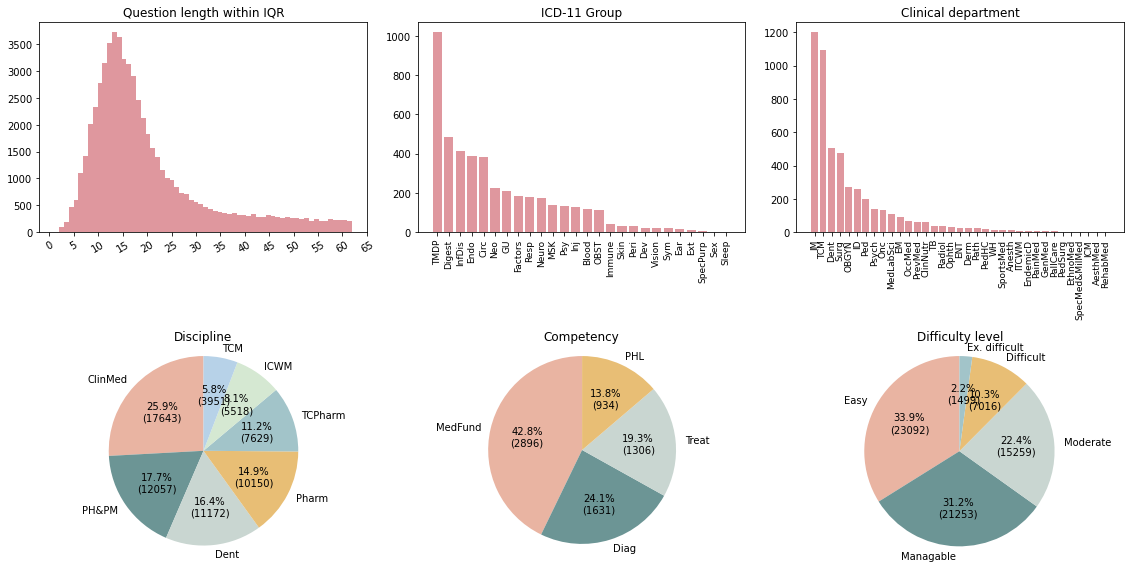

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ["Question length", 'ICD-11 Group', 'Clinical department',
           'Discipline', 'Competency', 'Difficulty level']

fig, axs = plt.subplots(2, 3, figsize=(16, 8))

axs = axs.flatten()
colors_I = ['#e9b4a2', '#6c9595', '#c9d6d1', '#e8be75', '#a2c4c9', '#d5e8d2', '#b7d2e8', '#e6b4e8']

for i, column in enumerate(columns):

    if i == 0:
        axs[i].set_title(f'{column} within IQR')
        question_lengths = df[column]

        # Calculating the quartiles and IQR
        q1 = np.percentile(question_lengths, 25)
        q3 = np.percentile(question_lengths, 75)
        iqr = q3 - q1

        # Filtering the column based on the IQR
        filtered_lengths = question_lengths[(question_lengths >= q1 - 1.5 * iqr) & (question_lengths <= q3 + 1.5 * iqr)]

        axs[i].hist(filtered_lengths, bins=len(np.unique(filtered_lengths)), color='#df979e')
        axs[i].tick_params(axis='x', rotation=30)
        axs[i].set_xticks(range(0, max(filtered_lengths) + 5, 5))

        continue
    axs[i].set_title(f'{column}')

    value_counts = df[df[column] != "N/A"][column].value_counts()

    total_population = value_counts.sum()
    filtered_counts = value_counts
    if i == 1 or i == 2:
        axs[i].tick_params(axis='x', rotation=90)
    elif i in [3, 5]:
        axs[i].tick_params(axis='x', rotation=20)

    # Pie chart
    if i in [3, 4, 5]:
        filtered_counts = filtered_counts.sort_values(ascending=False)
        wedges, _, autotexts = axs[i].pie(filtered_counts.values, labels=filtered_counts.index, colors=colors_I,
                                          autopct='%1.1f%%', startangle=90)
        axs[i].axis('equal')

        # Adding exact numbers under percentages
        for index, autotext in enumerate(autotexts):
            autotext.set_fontsize(10)

            # Calculating the percentage and corresponding count
            percentage = float(autotext.get_text().strip('%'))
            count = round((percentage / 100) * total_population)

            autotext.set_text(f'{percentage:.1f}%\n({count})')

    else:
        axs[i].bar(filtered_counts.index, filtered_counts.values, color='#df979e')

axs[1].tick_params(axis='x', labelsize=9)  # Modify labelsize as desired
axs[2].tick_params(axis='x', labelsize=9)  # Modify labelsize as desired
axs[3].tick_params(axis='x', labelsize=12)  # Modify labelsize as desired
axs[4].tick_params(axis='x', labelsize=12)  # Modify labelsize as desired
axs[5].tick_params(axis='x', labelsize=12)  # Modify labelsize as desired

plt.tight_layout()
plt.savefig('dataset_dist.pdf')  # Adjust the DPI value as desired
plt.show()


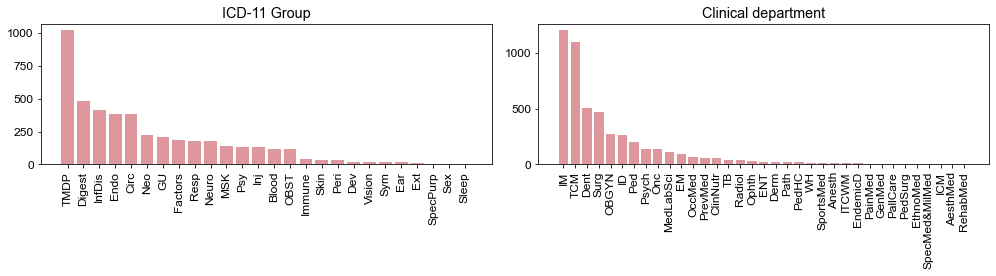

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams["mathtext.fontset"] = 'dejavusans'
matplotlib.rcParams['font.size'] = 12  # Adjust the font size as desired

columns = ['ICD-11 Group', 'Clinical department']

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].set_title(f'{column}')

    value_counts = df[df[column] != "N/A"][column].value_counts()

    total_population = value_counts.sum()
    filtered_counts = value_counts
    axs[i].tick_params(axis='x', rotation=90)

    axs[i].bar(filtered_counts.index, filtered_counts.values, color='#df979e')

axs[0].tick_params(axis='x', labelsize=12)  # Modify labelsize as desired
axs[0].tick_params(axis='x', labelsize=12)  # Modify labelsize as desired

plt.tight_layout()
plt.savefig('dataset_dist.pdf', dpi=300)  # Adjust the DPI value as desired
plt.show()


In [22]:
col = "Clinical department"
len(df[(~df[col].isna())&(df[col]!="N/A")])

4965

In [45]:
df["Clinical department"].value_counts()

N/A               1846
IM                1200
TCM               1095
Dent               506
Surg               473
OBGYN              270
ID                 262
Ped                202
Psych              140
Onc                135
MedLabSci          107
EM                  89
OccMed              65
PrevMed             62
ClinNutr            60
TB                  40
Radiol              36
Ophth               29
ENT                 25
Derm                25
Path                23
PedHC               20
WH                  16
SportsMed           15
Anesth              15
ITCWM               10
EndemicD             9
PainMed              8
GenMed               5
PallCare             5
PedSurg              4
EthnoMed             3
SpecMed&MilMed       3
ICM                  3
AesthMed             3
RehabMed             2
Name: Clinical department, dtype: int64

In [ ]:
test_df = pd.read_csv("data/test_with_annotation.csv")
len(df[(~df[col].isna())&(df[col]!="N/A")])/len(test_df)

In [ ]:
df.sample(1)[['标题', '选项', '答案', '答案解析', 'ICD-11 Group', 
       'Clinical department', 'Discipline', 'Competency',
       'Difficulty level']].to_csv("sample.csv",index=False)

In [24]:
df[df["标题"]=="心衰急性加重的诱因"][['标题', '选项', '答案', '答案解析', 'ICD-11 Group', 
       'Clinical department', 'Discipline', 'Competency',
       'Difficulty level']].to_csv("sample.csv",index=False)

In [50]:
median_iqr("标题")

median: 17.0 (Q1: 12.0, Q3: 32.0)


In [60]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")
dev_df = pd.read_csv("data/val.csv")
test_df = pd.read_csv("data/test_with_annotation.csv")

# Fill missing values with empty strings
train_df = train_df.fillna("")
dev_df = dev_df.fillna("")
test_df = test_df.fillna("")


In [68]:
import pandas as pd
import numpy as np

# Creating a dictionary to store the statistics
stats = {
    'Train': {},
    'Test': {},
    'Dev': {},
    'Total': {}
}

total_vocab = set()

# Calculating the statistics for each dataframe
for name, df in zip(['Train', 'Test', 'Dev'], [train_df, test_df, dev_df]):
    stats[name]['Question #'] = f"{len(df):,}"
    
    answer_explanation_chars = set("".join(df["答案解析"].astype(str).tolist()))
    title_chars = set("".join(df["标题"].tolist()))
    vocabulary = answer_explanation_chars.union(title_chars)
    total_vocab = total_vocab.union(vocabulary)
    vocab_size = len(vocabulary)
    stats[name]['Vocab'] = vocab_size
    
    stats[name]['Max Q tokens'] = df['标题'].apply(len).max()
    stats[name]['Max A tokens'] = df['答案'].apply(len).max()
    stats[name]['Max E tokens'] = df['答案解析'].apply(len).max()
    
    stats[name]['Avg Q tokens'] = df['标题'].apply(len).mean().round(2)
    stats[name]['Avg A tokens'] = df['答案'].apply(len).mean().round(2)
    stats[name]['Avg E tokens'] = df['答案解析'].apply(len).mean().round(2)
    
    stats[name]['Median (Q1, Q3) Q tokens'] = f"{df['标题'].apply(len).median()} ({df['标题'].apply(len).quantile(0.25)}, {df['标题'].apply(len).quantile(0.75)})"
    stats[name]['Median (Q1, Q3) A tokens'] = f"{df['答案'].apply(len).median()} ({df['答案'].apply(len).quantile(0.25)}, {df['答案'].apply(len).quantile(0.75)})"
    stats[name]['Median (Q1, Q3) E tokens'] = f"{df['答案解析'].apply(len).median()} ({df['答案解析'].apply(len).quantile(0.25)}, {df['答案解析'].apply(len).quantile(0.75)})"
    
# Calculating the total statistics
stats['Total']['Question #'] = f"{sum(len(df) for df in [train_df, test_df, dev_df]):,}"
stats['Total']['Vocab'] = len(total_vocab)
stats['Total']['Max Q tokens'] = max(df['标题'].apply(len).max() for df in [train_df, test_df, dev_df])
stats['Total']['Max A tokens'] = max(df['答案'].apply(len).max() for df in [train_df, test_df, dev_df])
stats['Total']['Max E tokens'] = max(df['答案解析'].apply(len).max() for df in [train_df, test_df, dev_df])
stats['Total']['Avg Q tokens'] = round(sum(df['标题'].apply(len).mean() for df in [train_df, test_df, dev_df]) / 3, 2)
stats['Total']['Avg A tokens'] = round(sum(df['答案'].apply(len).mean() for df in [train_df, test_df, dev_df]) / 3, 2)
stats['Total']['Avg E tokens'] = round(sum(df['答案解析'].apply(len).mean() for df in [train_df, test_df, dev_df]) / 3, 2)

stats['Total']['Median (Q1, Q3) Q tokens'] = f"{np.median([df['标题'].apply(len).median() for df in [train_df, test_df, dev_df]])} ({np.median([df['标题'].apply(len).quantile(0.25) for df in [train_df, test_df, dev_df]])}, {np.median([df['标题'].apply(len).quantile(0.75) for df in [train_df, test_df, dev_df]])})"
stats['Total']['Median (Q1, Q3) A tokens'] = f"{np.median([df['答案'].apply(len).median() for df in [train_df, test_df, dev_df]])} ({np.median([df['答案'].apply(len).quantile(0.25) for df in [train_df, test_df, dev_df]])}, {np.median([df['答案'].apply(len).quantile(0.75) for df in [train_df, test_df, dev_df]])})"
stats['Total']['Median (Q1, Q3) E tokens'] = f"{np.median([df['答案解析'].apply(len).median() for df in [train_df, test_df, dev_df]])} ({np.median([df['答案解析'].apply(len).quantile(0.25) for df in [train_df, test_df, dev_df]])}, {np.median([df['答案解析'].apply(len).quantile(0.75) for df in [train_df, test_df, dev_df]])})"

# Creating a DataFrame from the statistics dictionary
summary_table = pd.DataFrame(stats)

# Reordering the columns to match the desired order
summary_table = summary_table[['Train', 'Dev', 'Test', 'Total']]

# Displaying the summary table
summary_table


,Train,Dev,Test,Total
Question #,"54,497","6,811","6,811","68,119"
Vocab,4545,3620,3599,4629
Max Q tokens,676,500,585,676
Max A tokens,5,5,5,5
Max E tokens,2999,2678,2680,2999
Avg Q tokens,29.78,30.07,32.63,30.83
Avg A tokens,1.08,1.07,1.07,1.07
Avg E tokens,186.24,188.95,201.44,192.21
"Median (Q1, Q3) Q tokens","17.0 (12.0, 32.0)","18.0 (12.0, 32.0)","18.0 (12.0, 37.0)","18.0 (12.0, 32.0)"
"Median (Q1, Q3) A tokens","1.0 (1.0, 1.0)","1.0 (1.0, 1.0)","1.0 (1.0, 1.0)","1.0 (1.0, 1.0)"
